In [ ]:
!pip install keras==2.3.1
!pip install tensorflow==2.2.0

     |████████████████████████████████| 378kB 5.7MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 516.2MB 29kB/s 
     |████████████████████████████████| 3.0MB 50.1MB/s 
     |████████████████████████████████| 460kB 55.5MB/s 
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


#**Before Start**

In [ ]:
!pip install ar_wordcloud
!pip install arabic-reshaper
!pip install python-bidi
!pip install --upgrade tqdm

     |████████████████████████████████| 368kB 7.3MB/s 
  Created wheel for arabic-reshaper: filename=arabic_reshaper-2.1.0-cp36-none-any.whl size=16501 sha256=f3b1805fc3a7db61e3d426c58095fcd95bafb6b287c589d50986d853d057a0cb
  Stored in directory: /root/.cache/pip/wheels/a9/e6/ec/2ba48138d4447d40442dd6ba3bf6b92d9c6afd74e9c720c6fe
Successfully built arabic-reshaper
  Found existing installation: wordcloud 1.5.0
    Uninstalling wordcloud-1.5.0:
      Successfully uninstalled wordcloud-1.5.0
     |████████████████████████████████| 71kB 3.5MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [ ]:
import tensorflow
tensorflow.__version__

'2.2.0'

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6041064620044555179, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 16262557516831006729
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5404303989353920758
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15788201792
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2169546412854412873
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [ ]:
!cat /proc/meminfo

MemTotal:       26751688 kB
MemFree:        14773756 kB
MemAvailable:   25517840 kB
Buffers:          159204 kB
Cached:         10503952 kB
SwapCached:            0 kB
Active:          1008940 kB
Inactive:       10219904 kB
Active(anon):     458824 kB
Inactive(anon):     8604 kB
Active(file):     550116 kB
Inactive(file): 10211300 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:             20268 kB
Writeback:             0 kB
AnonPages:        565680 kB
Mapped:           448688 kB
Shmem:              9164 kB
Slab:             465640 kB
SReclaimable:     399684 kB
SUnreclaim:        65956 kB
KernelStack:        4480 kB
PageTables:         6788 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:    13375844 kB
Committed_AS:    2972696 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:             1904 kB
AnonHugePages:   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!cp /content/drive/My\ Drive/Colab\ Notebooks/3-class.csv 3-class.csv

In [ ]:
!cp /content/drive/My\ Drive/NotoNaskhArabic-Regular.ttf NotoNaskhArabic-Regular.ttf

In [ ]:
!cp /content/drive/My\ Drive/Colab\ Notebooks/stop_words.txt stop_words.txt

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlinBackend.figure_format = 'retina'
df_original = pd.read_csv('3-class.csv')
df_original.head(10)

,Tweet,Polarity
0,ابراهيم_عيسى الوسخ ابن الوسخه كلما حصل حادث ا...,neg
1,اخطر حروب الارض حرب العقيده حسيبك الله ي اول ...,neg
2,اصبحت تقدم برامج عبر الجمعيات الخيريه لايصال ...,neg
3,اعلامنا متمثل في داوودالشريان و روتانا وطقتهم...,neg
4,الاصرار مرتزقه_برنامج_الاصرار بضاعه هالمترديه...,neg
5,الاعلام اللبناني يهاجم السعوديه منذ مده بكل ق...,neg
6,البرنامج استاجر بعض المشاهير و الهوامير في تو...,neg
7,الحمد لله ما احتاج اتعلم من واحد فاشل اخلاقيا...,neg
8,الخرج بيض الله وجه محافظ الخرج فهذه القناه تص...,neg
9,الرياض السعوديه رسالتي لوزير العمل في حينه عن...,neg


In [ ]:
#Discovering dataset
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56674 entries, 0 to 56673
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     56674 non-null  object
 1   Polarity  56674 non-null  object
dtypes: object(2)
memory usage: 885.7+ KB


In [ ]:
#Discovering dataset
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56674 entries, 0 to 56673
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     56674 non-null  object
 1   Polarity  56674 non-null  object
dtypes: object(2)
memory usage: 885.7+ KB


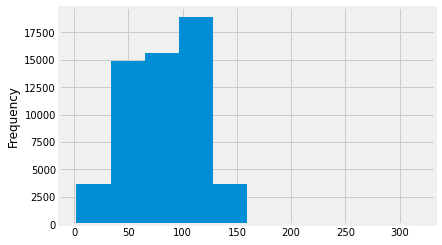

In [ ]:
#Discovering the tweets length
df_original['Tweet'].str.len().plot.hist()

In [ ]:
#Discovering the count of each class
df_original.Polarity.value_counts()

neg     20731
neut    18726
pos     17217
Name: Polarity, dtype: int64

In [ ]:
#Change class values from neg pos neut to 0 1 2
df_original['Polarity'] = df_original['Polarity'].map({'neg': 0, 'pos': 1, 'neut': 2})

In [ ]:
df_original[df_original.Polarity == 0].head(10)

,Tweet,Polarity
0,ابراهيم_عيسى الوسخ ابن الوسخه كلما حصل حادث ا...,0
1,اخطر حروب الارض حرب العقيده حسيبك الله ي اول ...,0
2,اصبحت تقدم برامج عبر الجمعيات الخيريه لايصال ...,0
3,اعلامنا متمثل في داوودالشريان و روتانا وطقتهم...,0
4,الاصرار مرتزقه_برنامج_الاصرار بضاعه هالمترديه...,0
5,الاعلام اللبناني يهاجم السعوديه منذ مده بكل ق...,0
6,البرنامج استاجر بعض المشاهير و الهوامير في تو...,0
7,الحمد لله ما احتاج اتعلم من واحد فاشل اخلاقيا...,0
8,الخرج بيض الله وجه محافظ الخرج فهذه القناه تص...,0
9,الرياض السعوديه رسالتي لوزير العمل في حينه عن...,0


In [ ]:
df_original['Tweet'].nunique()

55176

In [ ]:
repeat=[]
list_of_tweets = df_original['Tweet'].to_list()
for i in range(len(list_of_tweets)-1):
  if list_of_tweets[i] in list_of_tweets[i+1:]:
    repeat.append(i)
len(repeat)

1498

In [ ]:
df_original.drop(repeat,axis=0,inplace=True)
len(df_original)

55176

In [ ]:
df_original.reset_index(drop=True, inplace=True)
df_original.head()

,Tweet,Polarity
0,ابراهيم_عيسى الوسخ ابن الوسخه كلما حصل حادث ا...,0
1,اخطر حروب الارض حرب العقيده حسيبك الله ي اول ...,0
2,اصبحت تقدم برامج عبر الجمعيات الخيريه لايصال ...,0
3,اعلامنا متمثل في داوودالشريان و روتانا وطقتهم...,0
4,الاصرار مرتزقه_برنامج_الاصرار بضاعه هالمترديه...,0


In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55176 entries, 0 to 55175
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     55176 non-null  object
 1   Polarity  55176 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 862.2+ KB


In [ ]:
original = df_original['Tweet'].copy()
df_original['original'] = original
df_original.head()

,Tweet,Polarity,original
0,ابراهيم_عيسى الوسخ ابن الوسخه كلما حصل حادث ا...,0,ابراهيم_عيسى الوسخ ابن الوسخه كلما حصل حادث ا...
1,اخطر حروب الارض حرب العقيده حسيبك الله ي اول ...,0,اخطر حروب الارض حرب العقيده حسيبك الله ي اول ...
2,اصبحت تقدم برامج عبر الجمعيات الخيريه لايصال ...,0,اصبحت تقدم برامج عبر الجمعيات الخيريه لايصال ...
3,اعلامنا متمثل في داوودالشريان و روتانا وطقتهم...,0,اعلامنا متمثل في داوودالشريان و روتانا وطقتهم...
4,الاصرار مرتزقه_برنامج_الاصرار بضاعه هالمترديه...,0,الاصرار مرتزقه_برنامج_الاصرار بضاعه هالمترديه...


In [ ]:
df_original.to_csv('/content/drive/My Drive/Tweets_without_repeat.csv')

In [ ]:
df_original['pre_clean_len'] = [len(t) for t in df_original.Tweet]

In [ ]:
x = df_original.Tweet
y = df_original.Polarity

#**Preprocessing**

In [ ]:
# Data cleaning function definition

from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [ ]:
import re
from bs4 import BeautifulSoup

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
arabic_num_pat = '[٠١٢٣٤٥٦٧٨٩]'
eng_num_pat = '[0123456789]'
sharta_pat = '[_]'
#sharta_pat = '_[أ-ي]+' #for removing hashtag
eng_pat = '[A-Za-z]'

def tweet_cleaner(text):
  soup = BeautifulSoup(text, 'lxml')
  souped = soup.get_text()
  try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
  except:
        bom_removed = souped
  stripped = re.sub(combined_pat, '', bom_removed)
  stripped = re.sub(www_pat, '', stripped)
  stripped = re.sub(arabic_num_pat, '', stripped)
  stripped = re.sub(eng_num_pat, '', stripped)
  #stripped = re.sub(r'\w+_\s?','_',stripped) #for removing hashtag
  stripped = re.sub(sharta_pat, ' ', stripped)
  stripped = re.sub(eng_pat, ' ', stripped)

  words = [x for x in tok.tokenize(stripped) if len(x) > 1]
  return (" ".join(words)).strip()

##**auto-generated SW**

In [ ]:
clean_tweet_texts = []
for i in range(0, len(df_original)):
  if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed"%(i+1,len(df_original)))                                                                    
  clean_tweet_texts.append(tweet_cleaner(df_original['Tweet'][i]))

Tweets 10000 of 55176 has been processed
Tweets 20000 of 55176 has been processed
Tweets 30000 of 55176 has been processed
Tweets 40000 of 55176 has been processed
Tweets 50000 of 55176 has been processed


In [ ]:
clean_df = pd.DataFrame(clean_tweet_texts, columns=['text'])
clean_df['target'] = df_original.Polarity
clean_df['original'] = original
clean_df.to_csv('clean_tweet.csv', encoding='utf-8')

In [ ]:
csv = 'clean_tweet.csv'
df = pd.read_csv(csv, index_col=0)

In [ ]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55175 entries, 0 to 55174
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      55175 non-null  object
 1   target    55175 non-null  int64 
 2   original  55175 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [ ]:
df.head()

,text,target,original
0,ابراهيم عيسى الوسخ ابن الوسخه كلما حصل حادث ات...,0,ابراهيم_عيسى الوسخ ابن الوسخه كلما حصل حادث ا...
1,اخطر حروب الارض حرب العقيده حسيبك الله اول ال ...,0,اخطر حروب الارض حرب العقيده حسيبك الله ي اول ...
2,اصبحت تقدم برامج عبر الجمعيات الخيريه لايصال خ...,0,اصبحت تقدم برامج عبر الجمعيات الخيريه لايصال ...
3,اعلامنا متمثل في داوودالشريان روتانا وطقتهم كي...,0,اعلامنا متمثل في داوودالشريان و روتانا وطقتهم...
4,الاصرار مرتزقه برنامج الاصرار بضاعه هالمترديه ...,0,الاصرار مرتزقه_برنامج_الاصرار بضاعه هالمترديه...


In [ ]:
x = df.text
y = df.target
z = df.original

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(x)
neg_doc_matrix = cvec.transform(df[y ==0].text)
pos_doc_matrix = cvec.transform(df[y ==1].text)
neut_doc_matrix = cvec.transform(df[y ==2].text)

neg_tf = np.sum(neg_doc_matrix, axis=0)
pos_tf = np.sum(pos_doc_matrix, axis=0)
neut_tf = np.sum(neut_doc_matrix, axis=0)
word = cvec.get_feature_names()
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
neut = np.squeeze(np.asarray(neut_tf))

term_freq_df = pd.DataFrame([word, neg, pos, neut], columns= cvec.get_feature_names()).transpose()

term_freq_df.columns = ['word','negative', 'positive', 'neutral']
term_freq_df['total']=term_freq_df['negative'] + term_freq_df['positive'] + term_freq_df['neutral']
freq = term_freq_df.sort_values(by='total', ascending=False).iloc[:86024]

freq

,word,negative,positive,neutral,total
الهلال,الهلال,8173,9965,4609,22747
في,في,6348,4091,8040,18479
من,من,6404,3552,3671,13627
على,على,2911,2045,2216,7172
الاهلي,الاهلي,1563,3185,2041,6789
...,...,...,...,...,...
سوايا,سوايا,0,1,0,1
سوايرز,سوايرز,0,1,0,1
سوبببر,سوبببر,0,1,0,1
سوبرايز,سوبرايز,0,0,1,1


In [ ]:
old_length= len(df['text'][0])
old_length

105

In [ ]:
df['text'][0]

'ابراهيم عيسى الوسخ ابن الوسخه كلما حصل حادث اتهم السعوديه بالارهاب الكلب كان براتب مليون جنيه من سنوي مصر'

In [ ]:
words = freq['word'].to_list()
negative = freq['negative'].to_list()
positive = freq['positive'].to_list()
neutral = freq['neutral'].to_list()

final_labels = []

In [ ]:
for i in range(len(words)):
    if (negative[i]-positive[i]>=5) and (negative[i]-neutral[i]>=5):
        final_labels.append('negative')
    elif (positive[i]-negative[i]>=5) and (positive[i]-neutral[i]>=5):
        final_labels.append('positive')
    elif (neutral[i]-positive[i]>=5) and (neutral[i]-negative[i]>=5):
        final_labels.append('neutral')
    elif (positive[i]==0 and neutral[i]==0):
        final_labels.append('negative')
    elif (neutral[i]==0 and negative[i]==0):
        final_labels.append('positive')
    elif (positive[i]==0 and negative[i]==0):
        final_labels.append('neutral')
    else:
        final_labels.append('null')

In [ ]:
freq['Polarity'] = final_labels
final_labels[0:5]

['positive', 'neutral', 'negative', 'negative', 'positive']

In [ ]:
len(words)

86024

In [ ]:
len(final_labels)

86024

In [ ]:
freq_null=freq[freq['Polarity']=='null']

In [ ]:
null_words = freq_null['word'].to_list()

In [ ]:
len(null_words)

19883

In [ ]:
null_words[0]

'او'

In [ ]:
with open('null_words.txt', 'a', encoding='utf-8') as f:
    for ele in null_words:
        f.write(ele+'\n')

with open('null_words.txt','r',encoding='utf-8') as f:
    list_of_words = f.readlines()
    
clean_list=[]
for ele in list_of_words:
    clean_list.append(ele.rstrip('\n'))

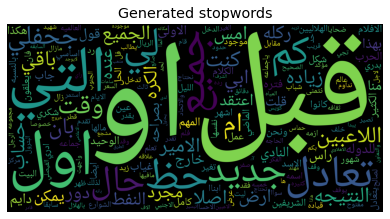

In [ ]:
from bidi.algorithm import get_display
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import arabic_reshaper 


f = open('null_words.txt', 'r', encoding='utf-8')
data = arabic_reshaper.reshape(f.read())
data = get_display(data) 
WordCloud = WordCloud(font_path='NotoNaskhArabic-Regular.ttf', background_color='black',
                  mode='RGB', width=2000, height=1000).generate(data)
plt.title("Generated stopwords")
plt.imshow(WordCloud)
plt.axis("off")
plt.show()

In [ ]:
def remove_words(st):
    tokens=st.split()
    new = []
    for word in tokens:
        if word not in clean_list:
            new.append(word)
    return ' '.join(new)

df['text']=df['text'].apply(remove_words)

In [ ]:
new_length=len(df['text'][0])
new_length

84

In [ ]:
df['text'][0]

'ابراهيم الوسخ ابن الوسخه كلما حصل حادث السعوديه بالارهاب الكلب كان مليون جنيه من مصر'

#complete process

In [ ]:
def normalizeArabic(text):
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "و", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    words = [x for x in tok.tokenize(text) if len(x) > 1]
    return ("".join(text)).strip()

clean_tweet = []
for i in range(0, len(df)):
  if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed"%(i+1,len(df)))                                                                    
  clean_tweet.append(normalizeArabic(df['text'][i]))

    
#repeated letters
import re
for i in range(len(clean_tweet)):
  clean_tweet[i] = re.sub(r'(.)\1+', r'\1\1', clean_tweet[i])

Tweets 10000 of 55175 has been processed
Tweets 20000 of 55175 has been processed
Tweets 30000 of 55175 has been processed
Tweets 40000 of 55175 has been processed
Tweets 50000 of 55175 has been processed


In [ ]:
clean_tweet[:10]

['ابراهيم الوسخ ابن الوسخه كلما حصل حادث السعوديه بالارهاب الكلب كان مليون جنيه من مصر',
 'اخطر حروب الارض حرب حسيبك الله ال راه رب يده زا',
 'اصبحت عبر الخيريه لايصال خبثها اين من هذا نطالب خادم الحرمين',
 'متمثل في داوودالشريان روتانا كيف ترجي من هالاشكال خير همهم في الحياه المراه',
 'الاصرار مرتزقه برنامج الاصرار بضاعه هالمترديه قناه العهر مزجاه في',
 'الاعلام يهاجم السعوديه منذ مده بكل قبيح ومجموعه تدعم الاعلام في لبنان فيها',
 'استاجر بعض في تويتر عشان يبررو لهم ويرقعو برنامج اصرار',
 'الحمد لله ما من واحد فاشل اخلاقيا همه الشحاذه من علي مواطن يفضح برنامج الاصرار برعايه',
 'الخرج بيض الله وجه الخرج القناه علي المسلمين من المخالفات والمحرمات تدعو الي الرذيله وتشوه صوره الاسلام',
 'الرياض السعوديه لوزير العمل في عن برنامج اصرار برنامج بفكرته منسوخ بشكل مبتذل وفاشل']

In [ ]:
df = pd.DataFrame(clean_tweet, columns=['text'])
df['polarity'] = y
df['original'] = z
df.rename(columns={'polarity':'target'},inplace=True)
df.to_csv('clean_tweet.csv', encoding='utf-8')

In [ ]:
csv = 'clean_tweet.csv'
df = pd.read_csv(csv, index_col=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55175 entries, 0 to 55174
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      55160 non-null  object
 1   target    55175 non-null  int64 
 2   original  55175 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
df.head()

,text,target,original
0,ابراهيم الوسخ ابن الوسخه كلما حصل حادث السعودي...,0,ابراهيم_عيسى الوسخ ابن الوسخه كلما حصل حادث ا...
1,اخطر حروب الارض حرب حسيبك الله ال راه رب يده زا,0,اخطر حروب الارض حرب العقيده حسيبك الله ي اول ...
2,اصبحت عبر الخيريه لايصال خبثها اين من هذا نطال...,0,اصبحت تقدم برامج عبر الجمعيات الخيريه لايصال ...
3,متمثل في داوودالشريان روتانا كيف ترجي من هالاش...,0,اعلامنا متمثل في داوودالشريان و روتانا وطقتهم...
4,الاصرار مرتزقه برنامج الاصرار بضاعه هالمترديه ...,0,الاصرار مرتزقه_برنامج_الاصرار بضاعه هالمترديه...


In [ ]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55160 entries, 0 to 55159
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      55160 non-null  object
 1   target    55160 non-null  int64 
 2   original  55160 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [ ]:
df.head()

,text,target,original
0,ابراهيم الوسخ ابن الوسخه كلما حصل حادث السعودي...,0,ابراهيم_عيسى الوسخ ابن الوسخه كلما حصل حادث ا...
1,اخطر حروب الارض حرب حسيبك الله ال راه رب يده زا,0,اخطر حروب الارض حرب العقيده حسيبك الله ي اول ...
2,اصبحت عبر الخيريه لايصال خبثها اين من هذا نطال...,0,اصبحت تقدم برامج عبر الجمعيات الخيريه لايصال ...
3,متمثل في داوودالشريان روتانا كيف ترجي من هالاش...,0,اعلامنا متمثل في داوودالشريان و روتانا وطقتهم...
4,الاصرار مرتزقه برنامج الاصرار بضاعه هالمترديه ...,0,الاصرار مرتزقه_برنامج_الاصرار بضاعه هالمترديه...


In [ ]:
text = df['text'].copy()
target = df['target'].copy()
original = df['original'].copy()

#copy with 3 columns
df = pd.DataFrame(text, columns=['text'])
df['target'] = target
df['original'] = original
df.to_csv('/content/drive/My Drive/clean_tweet.csv', encoding='utf-8')

#copy with 3 columns
my_df = pd.DataFrame(text, columns=['text'])
my_df['target'] = target

my_df.head()

,text,target
0,ابراهيم الوسخ ابن الوسخه كلما حصل حادث السعودي...,0
1,اخطر حروب الارض حرب حسيبك الله ال راه رب يده زا,0
2,اصبحت عبر الخيريه لايصال خبثها اين من هذا نطال...,0
3,متمثل في داوودالشريان روتانا كيف ترجي من هالاش...,0
4,الاصرار مرتزقه برنامج الاصرار بضاعه هالمترديه ...,0


In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55160 entries, 0 to 55159
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    55160 non-null  object
 1   target  55160 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 862.0+ KB


In [ ]:
x = my_df.text
y = my_df.target
z = df.original

In [ ]:
from sklearn.model_selection import train_test_split
SEED = 666
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.2, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

x_train_original, x_validation_and_test_original, y_train_original, y_validation_and_test_original = train_test_split(z, y, test_size=.2, random_state=SEED)
x_validation_original, x_test_original, y_validation_original, y_test_original = train_test_split(x_validation_and_test_original, y_validation_and_test_original, test_size=.5, random_state=SEED)

In [ ]:
x_test[5500:5516]

2389     لو رجل بدال الكويك نت حقكم والله انها اشلا من ...
53765    رجال الحد الجنوبي اللهم اني اسالك بكل اسم به ن...
7215     الهلال هجر حديثوا الصداره الطحلبيه يصيحون ويسم...
9554     معقوله اداراه الهلال ماتشوف التحكيم ضد فريقها ...
10691    طيب ليش عن اخطاا الحكم الفاضحه ضد الهلال قدع ل...
27359    بالون اختبار يبدو ان كانت اكبر من المتوقع ان ه...
29709    تعليق الدراسه في القصيم تعليق الدراسه سنابييني...
1647     حذف قناه العربيه من الريسيفر مع الاسف قناتين م...
32249    اذا صحت التسريبات قرار رسوم الاراضي البيضاا ال...
37958            وزير الداخليه البلجيكي يرفض امن اسال اكثر
53838    رجال الحد الجنوبي ربي لاتحرم شهداءهم الجنه وان...
14883    خدع الضعفاا من سنوات بشعاراته الكاذبه وضيع مدخ...
3659     حين اهل الحق عن اهل انهم علي حق علي بن طالب رض...
29170    بعطي اجازه لنفسي شكرا تيتشر نور تعليق الدراسه ...
54830       باتريوت امان لقوي التحالف في اليمن عاصفه الحزم
40158    نزيدوا صبابتا ويزيدوا وصلا بطولات هي السحر امت...
Name: text, dtype: object

In [ ]:
x_test_original[5500:5516]

2389     لو اعلق رجل جدتي بدال الكويك نت حقكم والله انه...
53765     رجال_الحد_الجنوبي اللهم اني اسالك بكل اسم سمي...
7215      الهلال_هجر حديثوا الصداره الطحلبيه يصيحون ويس...
9554     معقوله اداراه الهلال ماتشوف التحكيم ضد فريقها ...
10691     طيب ليش ماتتكلم عن اخطاا الحكم الفاضحه ضد اله...
27359     بالون اختبار يبدو ان رده الفعل كانت اكبر من ا...
29709     تعليق_الدراسه_في_القصيم تعليق_الدراسه سنابيين...
1647      حذف_قناه_العربيه_من_الريسيفر مع الاسف نشاهد ق...
32249     اذا صحت التسريبات التي تخص قرار رسوم_الاراضي_...
37958     وزير الداخليه البلجيكي يرفض اتهام اجهزه امن ب...
53838     رجال_الحد_الجنوبي ربي لاتحرم شهدائهم الجنه وا...
14883     خدع الضعفاا من سنوات بشعاراته المزيفه الكاذبه...
3659      حين سكت اهل الحق عن الباطل توهم اهل الباطل ان...
29170    بعطي اجازه لنفسي شكرا تيتشر نور تعليق_الدراسه_...
54830    صواريخ باتريوت الاماراتيه توفر مظله امان لقوى ...
40158     نزيدوا صبابتا ويزيدوا وصلا بطولات هي السحر ال...
Name: original, dtype: object

In [ ]:
print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive, {3:.2f}% neutral".format(len(x_train),
                                                                             (len(x_train[y_train == 0]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == 1]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == 2]) / (len(x_train)*1.))*100))
print("Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive, {3:.2f}% neutral".format(len(x_validation),
                                                                             (len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100,
                                                                            (len(x_validation[y_validation == 1]) / (len(x_validation)*1.))*100,
                                                                            (len(x_validation[y_validation == 2]) / (len(x_validation)*1.))*100))
print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive, {3:.2f}% neutral".format(len(x_test),
                                                                             (len(x_test[y_test == 0]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == 1]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == 2]) / (len(x_test)*1.))*100))


Train set has total 44128 entries with 36.15% negative, 30.95% positive, 32.90% neutral
Validation set has total 5516 entries with 35.88% negative, 29.71% positive, 34.41% neutral
Test set has total 5516 entries with 36.40% negative, 29.88% positive, 33.72% neutral


In [ ]:
#converting the labels to categorical data

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(44128, 3)

In [ ]:
y_validation = to_categorical(y_validation)

In [ ]:
y_validation.shape

(5516, 3)

#**word to vector**

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models.doc2vec import TaggedDocument
import multiprocessing
from sklearn import utils
from keras.preprocessing.text import Tokenizer

##**AraVec**

In [ ]:
!cp /content/drive/My\ Drive/Colab\ Notebooks/full_uni_cbow_100_twitter.zip /content/

In [ ]:
!cp /content/drive/My\ Drive/Colab\ Notebooks/full_uni_sg_100_twitter.zip /content/

In [ ]:
!unzip full_uni_cbow_100_twitter.zip

Archive:  full_uni_cbow_100_twitter.zip
  inflating: full_uni_cbow_100_twitter.mdl  
  inflating: full_uni_cbow_100_twitter.mdl.trainables.syn1neg.npy  
  inflating: full_uni_cbow_100_twitter.mdl.wv.vectors.npy  


In [ ]:
!unzip full_uni_sg_100_twitter.zip

Archive:  full_uni_sg_100_twitter.zip
  inflating: full_uni_sg_100_twitter.mdl  
  inflating: full_uni_sg_100_twitter.mdl.trainables.syn1neg.npy  
  inflating: full_uni_sg_100_twitter.mdl.wv.vectors.npy  


In [ ]:
from gensim.models import KeyedVectors
model_ug_cbow = KeyedVectors.load('full_uni_cbow_100_twitter.mdl')
model_ug_sg = KeyedVectors.load('full_uni_cbow_100_twitter.mdl')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
len(model_ug_cbow.wv.vocab.keys())

1259756

In [ ]:
embeddings_index = {}
for w in model_ug_cbow.wv.vocab.keys():
  embeddings_index[w] = np.append(model_ug_cbow.wv[w], 
                                  model_ug_sg.wv[w])
print(f'Found {len(embeddings_index)} word vectors.')

Found 1259756 word vectors.


#**Pad Sequence**

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

In [ ]:
len(tokenizer.word_index)

54873

In [ ]:
for x in x_train[:5]:
  print(x)

رفع اسعار البنزين والكهرباا والقادم اجمل واصلي يابلادي السعوديه اليمن
تعليق الدراسه في القصيم المطر في المدينه الدراسه بالقصيم غلط
بكره عندي اوف ان شاالله تعليق الدراسه في الرياض
هذا اللي يلعب من قلبب هذا روح الهلال الله لنا كثر مانحبك الهلال
الهلال هجر خماسيه راءعه اجمل عوده الشلهوب القاءد


In [ ]:
length = []
for x in x_train:
  length.append(len(x.split()))

In [ ]:
tweetlen= max(length)
tweetlen

28

In [ ]:
x_train_seq = pad_sequences(sequences, maxlen=tweetlen)
print('Shape of data tensor: ', x_train_seq.shape)

Shape of data tensor:  (44128, 28)


In [ ]:
x_train_seq[:5]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
           20,    21,    19,    24,   611,   180,  4913,  4317,     6,
           55],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            7,     8,     2,    12,   550,     2,   593,     8,   846,
         1218],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,   323,   308,  1315,    14,   916,     7,     8,     2,
           39],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,    28,    40,   237,
            3, 14152,    28,   339,     1,     9,   160,   574, 14153,
            1],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0

In [ ]:
sequences_val = tokenizer.texts_to_sequences(x_validation)
x_val_seq = pad_sequences(sequences_val, maxlen=tweetlen)

In [ ]:
num_words = 100000
embedding_matrix = np.zeros((num_words, 200)) #AraVec
#embedding_matrix = np.zeros((num_words, 300)) #ArabicNews & Fasttext

for word, i in tokenizer.word_index.items():
  if i >= num_words:
    continue
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
seed = 3

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.embeddings import Embedding

In [ ]:
sequences_test = tokenizer.texts_to_sequences(x_test)
x_test_seq = pad_sequences(sequences_test, maxlen=tweetlen)
y_test = to_categorical(y_test)

In [ ]:
!pip install keras_metrics

In [ ]:
import keras
import keras_metrics
from keras import layers
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import shutil

#**Bi-GRU with Auto-generated stopword**

##**1 layer**

In [ ]:
tensorboard = TensorBoard(log_dir="./logs/model_bigru")
keras_callbacks = [tensorboard]
import tensorflow as tf

In [ ]:
%%time

num = 1 #define how many stackings
#num = 2
#num = 3
#num = 4

#forward layers
rnn_cells_forward = [tf.keras.layers.GRUCell(100, dropout=0.2) for _ in range(num)]
stacked_forward = tf.keras.layers.StackedRNNCells(rnn_cells_forward)

#backward layers
rnn_cells_backward = [tf.keras.layers.GRUCell(100, dropout=0.2) for _ in range(num)]
stacked_backward = tf.keras.layers.StackedRNNCells(rnn_cells_backward)

forward_layer = tf.keras.layers.RNN(stacked_forward, return_sequences=True)
backward_layer = tf.keras.layers.RNN(stacked_backward, return_sequences=True, go_backwards=True)

model_bigru = tf.keras.Sequential() 
e = tf.keras.layers.Embedding(100000, 200, weights=[embedding_matrix], input_length=tweetlen
              , trainable=True)
model_bigru.add(e)
model_bigru.add(tf.keras.layers.Bidirectional(forward_layer, backward_layer= backward_layer))  
model_bigru.add(tf.keras.layers.Flatten())
model_bigru.add(tf.keras.layers.Dense(64,activation='relu'))
model_bigru.add(tf.keras.layers.Dense(3, activation='softmax'))
model_bigru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', keras_metrics.precision(), 
                           keras_metrics.recall(), keras_metrics.f1_score()])
print(model_bigru.summary())
history = model_bigru.fit(x_train_seq, y_train, validation_data=(x_val_seq, y_validation), epochs=5, batch_size=64, callbacks=keras_callbacks)

tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 28, 200)           20000000  
_________________________________________________________________
bidirectional (Bidirectional (None, 28, 200)           181200    
_________________________________________________________________
flatten (Flatten)            (No

In [ ]:
#1 layer gru
model_bigru.evaluate(x_test_seq, y_test)

173/173 [==============================] - 2s 13ms/step - loss: 0.5705 - accuracy: 0.8078 - precision: 0.8781 - recall: 0.8154 - f1_score: 0.8456


[0.570496141910553,
 0.8078317642211914,
 0.8780713677406311,
 0.8153975605964661,
 0.8455744981765747]

In [ ]:
# serialize model to JSON
model_json = model_bigru.to_json()
with open("/content/drive/My Drive/3-class/1_bigru/model_bigru.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model_bigru.save_weights("/content/drive/My Drive/3-class/1_bigru/model_bigru.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
shutil.move('/content/logs/model_bigru','/content/drive/My Drive/3-class/1_bigru/model_bigru')

'/content/drive/My Drive/3-class/1_bigru/model_bigru'

##**2 layer**

In [ ]:
tensorboard = TensorBoard(log_dir="./logs/model_2bigru")
keras_callbacks = [tensorboard]
                   

In [ ]:
%%time

#num = 1 #define how many stackings
num = 2
#num = 3
#num = 4

#forward layers
rnn_cells_forward = [tf.keras.layers.GRUCell(100, dropout=0.2) for _ in range(num)]
stacked_forward = tf.keras.layers.StackedRNNCells(rnn_cells_forward)

#backward layers
rnn_cells_backward = [tf.keras.layers.GRUCell(100, dropout=0.2) for _ in range(num)]
stacked_backward = tf.keras.layers.StackedRNNCells(rnn_cells_backward)

forward_layer = tf.keras.layers.RNN(stacked_forward, return_sequences=True)
backward_layer = tf.keras.layers.RNN(stacked_backward, return_sequences=True, go_backwards=True)

model_2bigru = tf.keras.Sequential() 
e = tf.keras.layers.Embedding(100000, 200, weights=[embedding_matrix], input_length=tweetlen
              , trainable=True)
model_2bigru.add(e)
model_2bigru.add(tf.keras.layers.Bidirectional(forward_layer, backward_layer= backward_layer))  
model_2bigru.add(tf.keras.layers.Flatten())
model_2bigru.add(tf.keras.layers.Dense(64,activation='relu'))
model_2bigru.add(tf.keras.layers.Dense(3, activation='softmax'))
model_2bigru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', keras_metrics.precision(), 
                           keras_metrics.recall(), keras_metrics.f1_score()])
print(model_2bigru.summary())
history = model_2bigru.fit(x_train_seq, y_train, validation_data=(x_val_seq, y_validation), epochs=5, batch_size=64, callbacks=keras_callbacks)

tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 28, 200)           20000000  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 28, 200)           302400    
_________________________________________________________________
flatten_1 (Flatten)          (

In [ ]:
#2 layer gru
model_2bigru.evaluate(x_test_seq, y_test)

173/173 [==============================] - 4s 22ms/step - loss: 0.5239 - accuracy: 0.8124 - precision: 0.8743 - recall: 0.8126 - f1_score: 0.8424


[0.523892343044281,
 0.8123640418052673,
 0.8743351697921753,
 0.8126279711723328,
 0.8423527479171753]

In [ ]:
# serialize model to JSON
model_json = model_2bigru.to_json()
with open("/content/drive/My Drive/3-class/2_bigru/model_2bigru.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model_2bigru.save_weights("/content/drive/My Drive/3-class/2_bigru/model_2bigru.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
shutil.move('/content/logs/model_2bigru','/content/drive/My Drive/3-class/2_bigru/model_2bigru')

'/content/drive/My Drive/3-class/2_bigru/model_2bigru'

##**3 layer**

In [ ]:
tensorboard = TensorBoard(log_dir="./logs/model_3bigru")
keras_callbacks = [tensorboard]
                   

In [ ]:
%%time

#num = 1 #define how many stackings
#num = 2
num = 3
#num = 4

#forward layers
rnn_cells_forward = [tf.keras.layers.GRUCell(100, dropout=0.2) for _ in range(num)]
stacked_forward = tf.keras.layers.StackedRNNCells(rnn_cells_forward)

#backward layers
rnn_cells_backward = [tf.keras.layers.GRUCell(100, dropout=0.2) for _ in range(num)]
stacked_backward = tf.keras.layers.StackedRNNCells(rnn_cells_backward)

forward_layer = tf.keras.layers.RNN(stacked_forward, return_sequences=True)
backward_layer = tf.keras.layers.RNN(stacked_backward, return_sequences=True, go_backwards=True)

model = tf.keras.Sequential() 
e = tf.keras.layers.Embedding(100000, 200, weights=[embedding_matrix], input_length=tweetlen
              , trainable=True)
model.add(e)
model.add(tf.keras.layers.Bidirectional(forward_layer, backward_layer= backward_layer))  
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', keras_metrics.precision(), 
                           keras_metrics.recall(), keras_metrics.f1_score()])
print(model.summary())
history = model.fit(x_train_seq, y_train, validation_data=(x_val_seq, y_validation), epochs=5, batch_size=64, callbacks=keras_callbacks)

tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 28, 200)           20000000  
_________________________________________________________________
bidirectional_2 (Bidirection (None, 28, 200)           423600    
_________________________________________________________________
flatten_2 (Flatten)          (

In [ ]:
#3 layer gru
model.evaluate(x_test_seq, y_test)

173/173 [==============================] - 6s 32ms/step - loss: 0.5668 - accuracy: 0.8127 - precision: 0.8747 - recall: 0.8093 - f1_score: 0.8407


[0.5668079257011414,
 0.812726616859436,
 0.8746705651283264,
 0.8092594742774963,
 0.8406943678855896]

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("/content/drive/My Drive/3-class/3_bigru/model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/3-class/3_bigru/model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
shutil.move('/content/logs/model_3bigru','/content/drive/My Drive/3-class/3_bigru/model')

'/content/drive/My Drive/3-class/3_bigru/model'

##**4 layer**

In [ ]:
tensorboard = TensorBoard(log_dir="./logs/model_4bigru")
keras_callbacks = [tensorboard]
                   

In [ ]:
%%time

#num = 1 #define how many stackings
#num = 2
#num = 3
num = 4

#forward layers
rnn_cells_forward = [tf.keras.layers.GRUCell(100, dropout=0.2) for _ in range(num)]
stacked_forward = tf.keras.layers.StackedRNNCells(rnn_cells_forward)

#backward layers
rnn_cells_backward = [tf.keras.layers.GRUCell(100, dropout=0.2) for _ in range(num)]
stacked_backward = tf.keras.layers.StackedRNNCells(rnn_cells_backward)

forward_layer = tf.keras.layers.RNN(stacked_forward, return_sequences=True)
backward_layer = tf.keras.layers.RNN(stacked_backward, return_sequences=True, go_backwards=True)

model_4bigru = tf.keras.Sequential() 
e = tf.keras.layers.Embedding(100000, 200, weights=[embedding_matrix], input_length=tweetlen
              , trainable=True)
model_4bigru.add(e)
model_4bigru.add(tf.keras.layers.Bidirectional(forward_layer, backward_layer= backward_layer))  
model_4bigru.add(tf.keras.layers.Flatten())
model_4bigru.add(tf.keras.layers.Dense(64,activation='relu'))
model_4bigru.add(tf.keras.layers.Dense(3, activation='softmax'))
model_4bigru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', keras_metrics.precision(), 
                           keras_metrics.recall(), keras_metrics.f1_score()])
print(model_4bigru.summary())
history = model_4bigru.fit(x_train_seq, y_train, validation_data=(x_val_seq, y_validation), epochs=5, batch_size=64, callbacks=keras_callbacks)

tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 28, 200)           20000000  
_________________________________________________________________
bidirectional_3 (Bidirection (None, 28, 200)           544800    
_________________________________________________________________
flatten_3 (Flatten)          (

In [ ]:
#4 layer gru
model_4bigru.evaluate(x_test_seq, y_test)

173/173 [==============================] - 6s 37ms/step - loss: 0.5683 - accuracy: 0.8013 - precision: 0.8724 - recall: 0.8099 - f1_score: 0.8400


[0.5683251023292542,
 0.8013052940368652,
 0.8724077939987183,
 0.8098771572113037,
 0.8399795889854431]

In [ ]:
# serialize model to JSON
model_json = model_4bigru.to_json()
with open("/content/drive/My Drive/3-class/4_bigru/model_4bigru.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model_4bigru.save_weights("/content/drive/My Drive/3-class/4_bigru/model_4bigru.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
shutil.move('/content/logs/model_4bigru','/content/drive/My Drive/3-class/4_bigru/model_4bigru')

'/content/drive/My Drive/3-class/4_bigru/model_4bigru'

##**5 layer**

In [ ]:
tensorboard = TensorBoard(log_dir="./logs/model_5bigru")
keras_callbacks = [tensorboard]
                   

In [ ]:
%%time

#num = 1 #define how many stackings
#num = 2
#num = 3
#num = 4
num = 5
#forward layers
rnn_cells_forward = [tf.keras.layers.GRUCell(100, dropout=0.2) for _ in range(num)]
stacked_forward = tf.keras.layers.StackedRNNCells(rnn_cells_forward)

#backward layers
rnn_cells_backward = [tf.keras.layers.GRUCell(100, dropout=0.2) for _ in range(num)]
stacked_backward = tf.keras.layers.StackedRNNCells(rnn_cells_backward)

forward_layer = tf.keras.layers.RNN(stacked_forward, return_sequences=True)
backward_layer = tf.keras.layers.RNN(stacked_backward, return_sequences=True, go_backwards=True)

model_5bigru = tf.keras.Sequential() 
e = tf.keras.layers.Embedding(100000, 200, weights=[embedding_matrix], input_length=tweetlen
              , trainable=True)
model_5bigru.add(e)
model_5bigru.add(tf.keras.layers.Bidirectional(forward_layer, backward_layer= backward_layer))  
model_5bigru.add(tf.keras.layers.Flatten())
model_5bigru.add(tf.keras.layers.Dense(64,activation='relu'))
model_5bigru.add(tf.keras.layers.Dense(3, activation='softmax'))
model_5bigru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', keras_metrics.precision(), 
                           keras_metrics.recall(), keras_metrics.f1_score()])
print(model_5bigru.summary())
history = model_5bigru.fit(x_train_seq, y_train, validation_data=(x_val_seq, y_validation), epochs=5, batch_size=64, callbacks=keras_callbacks)

tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 28, 200)           20000000  
_________________________________________________________________
bidirectional_4 (Bidirection (None, 28, 200)           666000    
_________________________________________________________________
flatten_4 (Flatten)          (

In [ ]:
#5 layer gru
model_5bigru.evaluate(x_test_seq, y_test)

173/173 [==============================] - 8s 44ms/step - loss: 0.5272 - accuracy: 0.8160 - precision: 0.8697 - recall: 0.8126 - f1_score: 0.8402


[0.5271825194358826,
 0.8159898519515991,
 0.8697239756584167,
 0.812615692615509,
 0.8402007222175598]

In [ ]:
# serialize model to JSON
model_json = model_5bigru.to_json()
with open("/content/drive/My Drive/3-class/5_bigru/model_5bigru.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model_5bigru.save_weights("/content/drive/My Drive/3-class/5_bigru/model_5bigru.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
shutil.move('/content/logs/model_5bigru','/content/drive/My Drive/3-class/5_bigru/model_5bigru')

'/content/drive/My Drive/3-class/5_bigru/model_5bigru'

##**6 layer**

In [ ]:
tensorboard = TensorBoard(log_dir="./logs/model_6bigru")
keras_callbacks = [tensorboard]
                   

In [ ]:
%%time

#num = 1 #define how many stackings
#num = 2
#num = 3
#num = 4
#num = 5
num=6
#forward layers
rnn_cells_forward = [tf.keras.layers.GRUCell(100, dropout=0.2) for _ in range(num)]
stacked_forward = tf.keras.layers.StackedRNNCells(rnn_cells_forward)

#backward layers
rnn_cells_backward = [tf.keras.layers.GRUCell(100, dropout=0.2) for _ in range(num)]
stacked_backward = tf.keras.layers.StackedRNNCells(rnn_cells_backward)

forward_layer = tf.keras.layers.RNN(stacked_forward, return_sequences=True)
backward_layer = tf.keras.layers.RNN(stacked_backward, return_sequences=True, go_backwards=True)

model_6bigru = tf.keras.Sequential() 
e = tf.keras.layers.Embedding(100000, 200, weights=[embedding_matrix], input_length=tweetlen
              , trainable=True)
model_6bigru.add(e)
model_6bigru.add(tf.keras.layers.Bidirectional(forward_layer, backward_layer= backward_layer))  
model_6bigru.add(tf.keras.layers.Flatten())
model_6bigru.add(tf.keras.layers.Dense(64,activation='relu'))
model_6bigru.add(tf.keras.layers.Dense(3, activation='softmax'))
model_6bigru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', keras_metrics.precision(), 
                           keras_metrics.recall(), keras_metrics.f1_score()])
print(model_6bigru.summary())
history = model_6bigru.fit(x_train_seq, y_train, validation_data=(x_val_seq, y_validation), epochs=5, batch_size=64, callbacks=keras_callbacks)

tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 28, 200)           20000000  
_________________________________________________________________
bidirectional_5 (Bidirection (None, 28, 200)           787200    
_________________________________________________________________
flatten_5 (Flatten)          (

In [ ]:
#6 layer gru
model_6bigru.evaluate(x_test_seq, y_test)

173/173 [==============================] - 9s 53ms/step - loss: 0.5261 - accuracy: 0.8106 - precision: 0.8696 - recall: 0.8104 - f1_score: 0.8390


[0.526131808757782,
 0.810551106929779,
 0.8696079850196838,
 0.8104419112205505,
 0.8389829993247986]

In [ ]:
# serialize model to JSON
model_json = model_6bigru.to_json()
with open("/content/drive/My Drive/3-class/6_bigru/model_6bigru.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model_6bigru.save_weights("/content/drive/My Drive/3-class/6_bigru/model_6bigru.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
shutil.move('/content/logs/model_6bigru','/content/drive/My Drive/3-class/6_bigru/model_6bigru')

'/content/drive/My Drive/3-class/6_bigru/model_6bigru'

##**7 layer**

In [ ]:
tensorboard = TensorBoard(log_dir="./logs/model_7bigru")
keras_callbacks = [tensorboard]
                   

In [ ]:
%%time

#num = 1 #define how many stackings
#num = 2
#num = 3
#num = 4
#num = 5
#num = 6
num=7
#forward layers
rnn_cells_forward = [tf.keras.layers.GRUCell(100, dropout=0.2) for _ in range(num)]
stacked_forward = tf.keras.layers.StackedRNNCells(rnn_cells_forward)

#backward layers
rnn_cells_backward = [tf.keras.layers.GRUCell(100, dropout=0.2) for _ in range(num)]
stacked_backward = tf.keras.layers.StackedRNNCells(rnn_cells_backward)

forward_layer = tf.keras.layers.RNN(stacked_forward, return_sequences=True)
backward_layer = tf.keras.layers.RNN(stacked_backward, return_sequences=True, go_backwards=True)

model_7bigru = tf.keras.Sequential() 
e = tf.keras.layers.Embedding(100000, 200, weights=[embedding_matrix], input_length=tweetlen
              , trainable=True)
model_7bigru.add(e)
model_7bigru.add(tf.keras.layers.Bidirectional(forward_layer, backward_layer= backward_layer))  
model_7bigru.add(tf.keras.layers.Flatten())
model_7bigru.add(tf.keras.layers.Dense(64,activation='relu'))
model_7bigru.add(tf.keras.layers.Dense(3, activation='softmax'))
model_7bigru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', keras_metrics.precision(), 
                           keras_metrics.recall(), keras_metrics.f1_score()])
print(model_7bigru.summary())
history = model_7bigru.fit(x_train_seq, y_train, validation_data=(x_val_seq, y_validation), epochs=5, batch_size=64, callbacks=keras_callbacks)

tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 28, 200)           20000000  
_________________________________________________________________
bidirectional_6 (Bidirection (None, 28, 200)           908400    
_________________________________________________________________
flatten_6 (Flatten)          (

In [ ]:
#7 layer gru
model_7bigru.evaluate(x_test_seq, y_test)

173/173 [==============================] - 10s 60ms/step - loss: 0.5183 - accuracy: 0.8089 - precision: 0.8675 - recall: 0.8118 - f1_score: 0.8387


[0.5182809233665466,
 0.8089194893836975,
 0.8675015568733215,
 0.8118181228637695,
 0.8387364149093628]

In [ ]:
# serialize model to JSON
model_json = model_7bigru.to_json()
with open("/content/drive/My Drive/3-class/7_bigru/model_7bigru.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model_7bigru.save_weights("/content/drive/My Drive/3-class/7_bigru/model_7bigru.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
shutil.move('/content/logs/model_7bigru','/content/drive/My Drive/3-class/7_bigru/model_7bigru')

'/content/drive/My Drive/3-class/7_bigru/model_7bigru'

#**Bi-LSTM with Auto-generated stopword**

##**2 layer**

In [ ]:
tensorboard = TensorBoard(log_dir="./logs/model_2bilstm")
keras_callbacks = [tensorboard] 

In [ ]:
%%time

#num = 1 #define how many stackings
num = 2
#num = 3
#num = 4

#forward layers
rnn_cells_forward = [tf.keras.layers.LSTMCell(100, dropout=0.2) for _ in range(num)]
stacked_forward = tf.keras.layers.StackedRNNCells(rnn_cells_forward)

#backward layers
rnn_cells_backward = [tf.keras.layers.LSTMCell(100, dropout=0.2) for _ in range(num)]
stacked_backward = tf.keras.layers.StackedRNNCells(rnn_cells_backward)

forward_layer = tf.keras.layers.RNN(stacked_forward, return_sequences=True)
backward_layer = tf.keras.layers.RNN(stacked_backward, return_sequences=True, go_backwards=True)

model_2bilstm = tf.keras.Sequential() 
e = tf.keras.layers.Embedding(100000, 200, weights=[embedding_matrix], input_length=tweetlen
              , trainable=True)
model_2bilstm.add(e)
model_2bilstm.add(tf.keras.layers.Bidirectional(forward_layer, backward_layer= backward_layer))  
model_2bilstm.add(tf.keras.layers.Flatten())
model_2bilstm.add(tf.keras.layers.Dense(64,activation='relu'))
model_2bilstm.add(tf.keras.layers.Dense(3, activation='softmax'))
model_2bilstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', keras_metrics.precision(), 
                           keras_metrics.recall(), keras_metrics.f1_score()])
print(model_2bilstm.summary())
history = model_2bilstm.fit(x_train_seq, y_train, validation_data=(x_val_seq, y_validation), epochs=5, batch_size=64, callbacks=keras_callbacks)

tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 28, 200)           20000000  
_________________________________________________________________
bidirectional_8 (Bidirection (None, 28, 200)           401600    
_________________________________________________________________
flatten_8 (Flatten)          (

In [ ]:
#2 layer lstm
model_2bilstm.evaluate(x_test_seq, y_test)

173/173 [==============================] - 3s 17ms/step - loss: 0.5154 - accuracy: 0.8136 - precision: 0.8743 - recall: 0.8176 - f1_score: 0.8450


[0.5154424905776978,
 0.8136330842971802,
 0.8742858171463013,
 0.8175840973854065,
 0.8449844717979431]

In [ ]:
# serialize model to JSON
model_json = model_2bilstm.to_json()
with open("/content/drive/My Drive/3-class/2_bilstm/model_2bilstm.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model_2bilstm.save_weights("/content/drive/My Drive/3-class/2_bilstm/model_2bilstm.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
shutil.move('/content/logs/model_2bilstm','/content/drive/My Drive/3-class/2_bilstm/model_2bilstm')

'/content/drive/My Drive/3-class/2_bilstm/model_2bilstm'

#**Save model**

In [ ]:
l = x_test_original.to_list()
pred = model_5bigru.predict_classes(x_test_seq)

In [ ]:
new = [] 
for ele in l: 
  x = [] 
  x.append(l[l.index(ele)]) 
  x.append(pred[l.index(ele)]) 
  new.append(x)  
print(new[0:5])


[['ايش هالنباح الهلال التعاون', 2], ['الف مبروك عشاق الزعيم البطوله ولا للمجد بقيه الهلال يعني ان اكثر واكثر ان تفرح اكثر واكثر', 1], ['اخبار اعتقالات بسلوفاكيا علي خلفيه هجمات باريس القت السلطات السلوفاكيه القبض علي الجزيره', 2], ['مشكله برشلونه ان شقوك وان هاجمت جلدوك وان لعبت جننونك يا اخوان هذا اللعين خرشنا الحمدلله ماهو معه', 0], ['الحمدلله حتي ترضي الحمدلله بعد الرضي الحمدلله اذا رضيت الف مبروك شعب العالمي اداا ومستوي النصر الاتحاد', 1]]


In [ ]:
df = pd.DataFrame(new, columns=['Testing Data','Predicted Labels'])  
df.head()

,Testing Data,Predicted Labels
0,ايش هالنباح الهلال التعاون,2
1,الف مبروك عشاق الزعيم البطوله ولا للمجد بقيه ا...,1
2,اخبار اعتقالات بسلوفاكيا علي خلفيه هجمات باريس...,2
3,مشكله برشلونه ان شقوك وان هاجمت جلدوك وان لعبت...,0
4,الحمدلله حتي ترضي الحمدلله بعد الرضي الحمدلله ...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5516 entries, 0 to 5515
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Testing Data      5516 non-null   object
 1   Predicted Labels  5516 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 86.3+ KB


In [ ]:
df.to_csv('/content/drive/My Drive/3-class/bigru.csv', encoding='utf-8')